### Tests de entrenamiento para el conjunto de datos IRIS 

Comenzamos importando todas las librerías y los módulos necesarios para poder entrenar el conjunto de datos IRIS:

In [1]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix, roc_curve
import matplotlib.pyplot as plt

Cargamos los datos de IRIS y preprocesamos los datos:

In [249]:
X, y = load_iris_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba:

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y agregamos capas a esta.

In [251]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal.

In [252]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test]))
acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.26666666666666666
epoch   0 - Loss 3.21659, Accuracy 0.79167
epoch  10 - Loss 0.20825, Accuracy 0.79167
epoch  20 - Loss 0.07194, Accuracy 0.87500
epoch  30 - Loss 0.01842, Accuracy 0.91667
epoch  40 - Loss 0.00706, Accuracy 0.91667
epoch  50 - Loss 0.00301, Accuracy 0.91667
epoch  60 - Loss 0.00137, Accuracy 0.91667
epoch  70 - Loss 0.00067, Accuracy 0.91667
epoch  80 - Loss 0.00036, Accuracy 0.91667
epoch  90 - Loss 0.00021, Accuracy 0.91667
epoch 100 - Loss 0.00013, Accuracy 0.91667
epoch 110 - Loss 0.00009, Accuracy 0.91667
epoch 120 - Loss 0.00006, Accuracy 0.91667
epoch 130 - Loss 0.00004, Accuracy 0.91667
epoch 140 - Loss 0.00003, Accuracy 0.91667
epoch 150 - Loss 0.00002, Accuracy 0.91667
epoch 160 - Loss 0.00002, Accuracy 0.91667
epoch 170 - Loss 0.00001, Accuracy 0.91667
epoch 180 - Loss 0.00001, Accuracy 0.91667
epoch 190 - Loss 0.00001, Accuracy 0.91667
epoch 200 - Loss 0.00001, Accuracy 0.91667
epoch 210 - Loss 0.00000, Accuracy 0.91667
epoch 2

El accuracy después del entrenamiento es el siguiente:

In [253]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.9666666666666667


Después de calcular las predicciones, podemos visualizar la matriz de confusión:

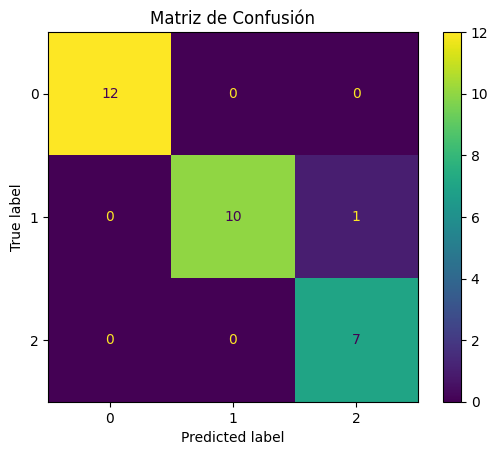

In [254]:
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

La matriz de confusión revela un desempeño casi excepcional del modelo con una precisión del 97%. Todas las instancias han sido clasificadas correctamente en sus respectivas clases: 12 para la clase 0, y 7 para la clase 2. Sin embargo, la clase 1 un número fue clasificado incorrectamente como un 2.

A continuación, realizaremos la misma prueba pero añadiendo más capas y cambiando la función de activación:

In [255]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(4, 20, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(20, 10, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(10, 6, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(6, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [256]:
print("Accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test]))

acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.6333333333333333
epoch   0 - Loss 0.13225, Accuracy 0.87500
epoch  10 - Loss 0.00001, Accuracy 0.83333
epoch  20 - Loss 0.00000, Accuracy 0.87500
epoch  30 - Loss 0.00000, Accuracy 0.91667
epoch  40 - Loss 0.00000, Accuracy 0.91667
epoch  50 - Loss 0.00000, Accuracy 0.91667
epoch  60 - Loss 0.00000, Accuracy 0.91667
epoch  70 - Loss 0.00000, Accuracy 0.91667
epoch  80 - Loss 0.00000, Accuracy 0.91667
epoch  90 - Loss 0.00000, Accuracy 0.91667
epoch 100 - Loss 0.00000, Accuracy 0.91667
epoch 110 - Loss -0.00000, Accuracy 0.91667
epoch 120 - Loss -0.00000, Accuracy 0.91667
epoch 130 - Loss -0.00000, Accuracy 0.91667
epoch 140 - Loss -0.00000, Accuracy 0.91667
epoch 150 - Loss -0.00000, Accuracy 0.91667
epoch 160 - Loss -0.00000, Accuracy 0.91667
epoch 170 - Loss -0.00000, Accuracy 0.91667
epoch 180 - Loss -0.00000, Accuracy 0.91667
epoch 190 - Loss -0.00000, Accuracy 0.91667
epoch 200 - Loss -0.00000, Accuracy 0.91667
epoch 210 - Loss -0.00000, Accuracy 0.916

In [257]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9333333333333333


En este segundo modelo la precisión sigue siendo alta aunque no es mejor que la del modelo anterior, para poder ver a que se debe dibujaremos la matriz de confusión:

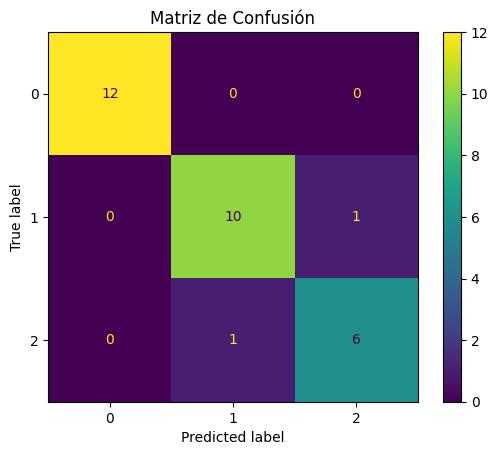

In [258]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)


La matriz de confusión del segundo modelo muestra un rendimiento notable con una precisión total del aproximadamente 93.3%. Se han clasificado correctamente todas las instancias de la clase 0 (12). Sin embargo, el modelo confunde una instancia de la clase 1 con la clase 2, y una instancia de la clase 2 con la clase 1.

Como podemos ver en los resultados, nos damos cuenta que el accuracy bajó en relación con el anterior modelo:

$$ \text{Accuracy}_{1ermodelo}=0.97$$

$$ \text{Accuracy}_{2domodelo}=0.93$$

En resumen, ambos modelos muestran un desempeño competitivo, la neurona funciona bien aún poniendo más capas o cambiando las funciones de activación, aunque el primer modelo sigue siendo mejor al tener menos capas ocultas, si hacemos más pruebas podemos comprobarlo.

Para finalizar con este test, graficaremos la precisión y la pérdida a lo largo de las épocas:

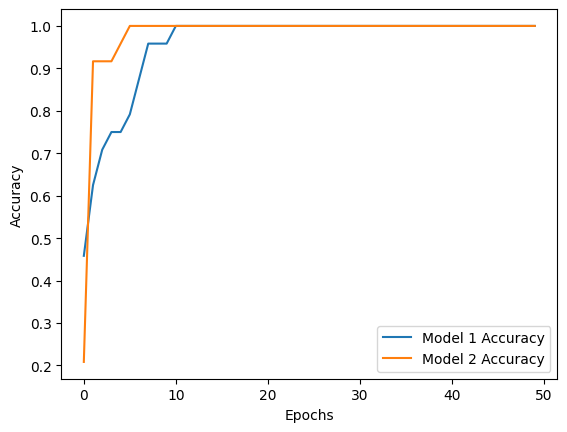

In [29]:
plt.plot(acc1, label="Model 1 Accuracy")
plt.plot(acc2, label="Model 2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

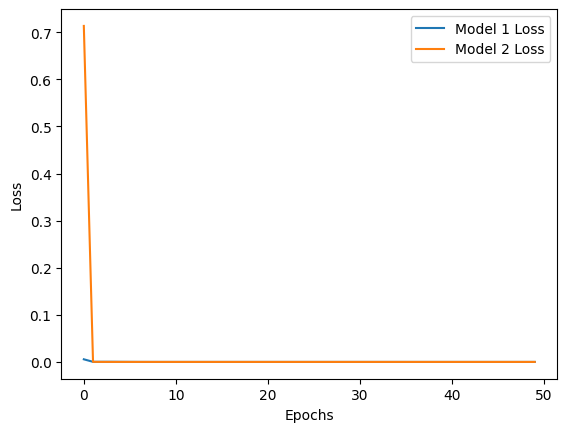

In [30]:
plt.plot(loss1, label="Model 1 Loss")
plt.plot(loss2, label="Model 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Test de entrenamiento del conjunto de datos DIGITS

Empezamos importando todas las librerías y los módulos necesarios para poder entrenar el segundo conjunto de datos, en este caso DIGITS:

In [17]:
from data.load_data import load_digits_data
from Neural_Network.layer import Layer
from Neural_Network.neural_network import NeuralNetwork
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

Cargamos y preprocesamos los datos del conjunto de datos DIGITS:

In [262]:
X, y = load_digits_data()
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de test y entrenamiento:

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y entrenamos.

In [264]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [265]:
accuracy_before = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before)

acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.1361111111111111
epoch   0 - Loss 0.90624, Accuracy 0.48264
epoch  10 - Loss 0.65167, Accuracy 0.73264
epoch  20 - Loss 0.26398, Accuracy 0.76042
epoch  30 - Loss 0.17442, Accuracy 0.75347
epoch  40 - Loss 0.12700, Accuracy 0.77778
epoch  50 - Loss 0.11391, Accuracy 0.78125
epoch  60 - Loss 0.11213, Accuracy 0.77778
epoch  70 - Loss 0.11359, Accuracy 0.77778
epoch  80 - Loss 0.10608, Accuracy 0.78819
epoch  90 - Loss 0.09849, Accuracy 0.79167
epoch 100 - Loss 0.09288, Accuracy 0.78472
epoch 110 - Loss 0.08516, Accuracy 0.79514
epoch 120 - Loss 0.07383, Accuracy 0.78125
epoch 130 - Loss 0.06611, Accuracy 0.77778
epoch 140 - Loss 0.06055, Accuracy 0.78125
epoch 150 - Loss 0.05070, Accuracy 0.78819
epoch 160 - Loss 0.03641, Accuracy 0.78819
epoch 170 - Loss 0.02800, Accuracy 0.78819
epoch 180 - Loss 0.02382, Accuracy 0.78472
epoch 190 - Loss 0.02129, Accuracy 0.78125
epoch 200 - Loss 0.01946, Accuracy 0.78125
epoch 210 - Loss 0.01791, Accuracy 0.78472
epoch 22

El accuracy final después de entrenar es el siguiente:

In [266]:
Y_pred1 = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred1)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.8583333333333333


Ahora visualizaremos en una matriz de confusión el rendimiento del modelo:

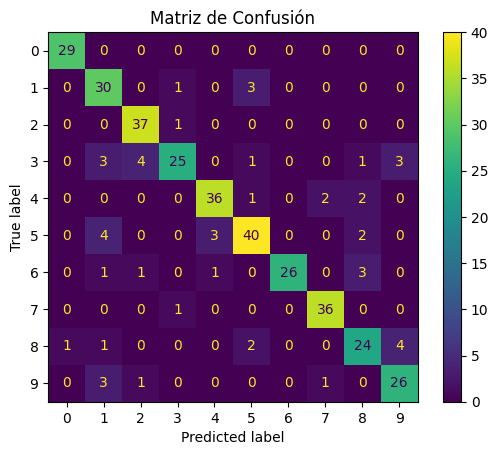

In [267]:
y_pred_classes = np.argmax(Y_pred1, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos observar, con este dataset el modelo contiene una alta precisión clasificando las clases, aunque podría ser mejor.

Ahora vamos a probar añadiendo más capas y cambiando las funciones de activación

In [268]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(64, 32, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(32, 16, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(16, 8, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(8, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [269]:
accuracy_before_nn2 = NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test])
print("Accuracy before training (Model 2): ", accuracy_before_nn2)

acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)


Accuracy before training (Model 2):  0.14166666666666666
epoch   0 - Loss 2.36797, Accuracy 0.17361
epoch  10 - Loss 1.51511, Accuracy 0.64236
epoch  20 - Loss 0.24086, Accuracy 0.84375
epoch  30 - Loss 0.09447, Accuracy 0.88194
epoch  40 - Loss 0.05550, Accuracy 0.89931
epoch  50 - Loss 0.03607, Accuracy 0.89236
epoch  60 - Loss 0.02601, Accuracy 0.89236
epoch  70 - Loss 0.01986, Accuracy 0.89583
epoch  80 - Loss 0.01577, Accuracy 0.89931
epoch  90 - Loss 0.01293, Accuracy 0.89583
epoch 100 - Loss 0.01102, Accuracy 0.89236
epoch 110 - Loss 0.00961, Accuracy 0.90278
epoch 120 - Loss 0.00849, Accuracy 0.90972
epoch 130 - Loss 0.00738, Accuracy 0.90972
epoch 140 - Loss 0.00665, Accuracy 0.90972
epoch 150 - Loss 0.00612, Accuracy 0.90972
epoch 160 - Loss 0.00564, Accuracy 0.90972
epoch 170 - Loss 0.00521, Accuracy 0.90972
epoch 180 - Loss 0.00482, Accuracy 0.90972
epoch 190 - Loss 0.00446, Accuracy 0.90972
epoch 200 - Loss 0.00415, Accuracy 0.90972
epoch 210 - Loss 0.00386, Accuracy 0.913

In [270]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test - Model 2): ", acc_model2)


Accuracy after training (on test - Model 2):  0.925


Visuzalización de la matriz de confusión para este segundo modelo:

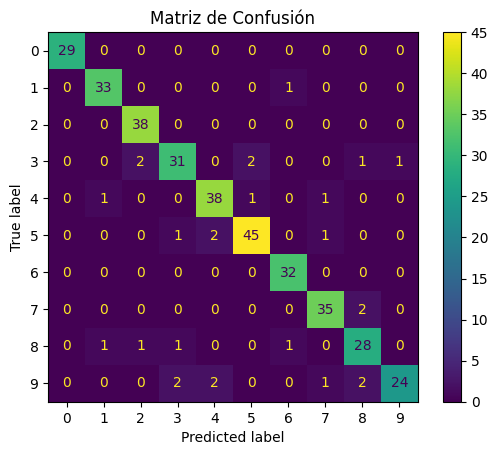

In [271]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como se puede observar, en el segundo modelo se nota una clara mejoría con respecto al primero:

$$ \text{Accuracy}_{1ermodelo}=0.85$$

$$ \text{Accuracy}_{2domodelo}=0.925$$

Esto es debido probablemente al uso de otra función de activación.

Para finalizar con este segundo test, imprimiremos la curva de roc para estos dos modelos:

In [272]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_bin = label_binarize(y_test_labels, classes=np.arange(10))  # Cambiar según el número de clases
n_classes = y_test_bin.shape[1]

In [15]:
def plot_roc_curve(y_score, y_test_bin, model_number):
    plt.figure()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Calcula la curva ROC
        roc_auc = auc(fpr, tpr)  # Calcula el AUC
        plt.plot(fpr, tpr, lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - Model {model_number}')
    plt.legend(loc="lower right")
    plt.show()

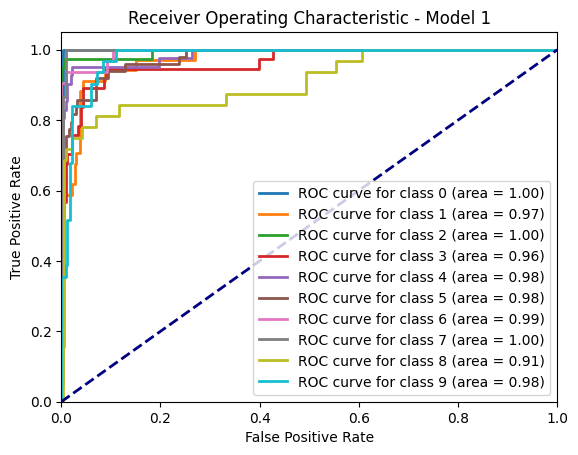

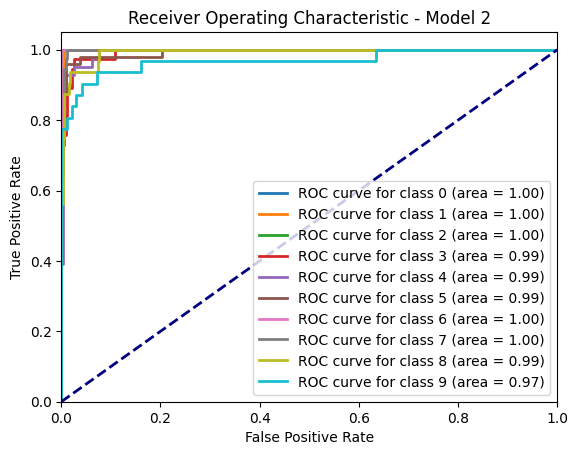

In [274]:
y_score1 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score1, y_test_bin, 1)

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score2, y_test_bin, 2)

### Tests de entrenamiento para el conjunto de datos WINE 

Importamos el método para extraer los datos del conjunto de datos WINE

In [2]:
from data.load_data import load_wine_data

Cargamos los datos y los preprocesamos

In [3]:
X, y = load_wine_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Ahora dividimos el conjunto de datos en train y test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

A continuación definimos la red

In [5]:
nn = NeuralNetwork()
nn.add_layer(Layer(13, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 4, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(4, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Para este primer modelo haremos una red con 2 capas ocultas y una softmax para la salida

Y ahora entrenamos el modelo

In [6]:
accuracy_before = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before)

acc1, loss1 = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.1388888888888889
epoch   0 - Loss 0.06603, Accuracy 0.79310
epoch  10 - Loss 0.00000, Accuracy 0.96552
epoch  20 - Loss 0.00000, Accuracy 0.96552
epoch  30 - Loss 0.00000, Accuracy 0.96552
epoch  40 - Loss -0.00000, Accuracy 0.96552
epoch  50 - Loss -0.00000, Accuracy 1.00000
epoch  60 - Loss -0.00000, Accuracy 1.00000
epoch  70 - Loss -0.00000, Accuracy 1.00000
epoch  80 - Loss -0.00000, Accuracy 1.00000
epoch  90 - Loss -0.00000, Accuracy 1.00000
epoch 100 - Loss -0.00000, Accuracy 1.00000
epoch 110 - Loss -0.00000, Accuracy 1.00000
epoch 120 - Loss -0.00000, Accuracy 1.00000
epoch 130 - Loss -0.00000, Accuracy 1.00000
epoch 140 - Loss -0.00000, Accuracy 1.00000
epoch 150 - Loss -0.00000, Accuracy 1.00000
epoch 160 - Loss -0.00000, Accuracy 1.00000
epoch 170 - Loss -0.00000, Accuracy 1.00000
epoch 180 - Loss -0.00000, Accuracy 1.00000
epoch 190 - Loss -0.00000, Accuracy 1.00000
epoch 200 - Loss -0.00000, Accuracy 1.00000
epoch 210 - Loss -0.00000, Accurac

El accuracy después de entrenar este primer modelo es el siguiente:

In [7]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.9166666666666666


Ahora para una mejor visualización, dibujaremos la matriz de confusión de este primer modelo

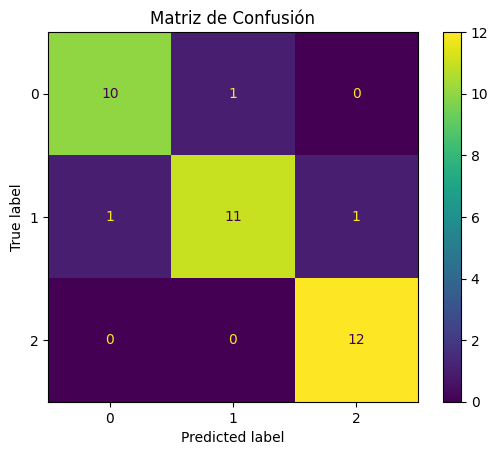

In [8]:
y_pred_classes = np.argmax(Y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos ver, ha funcionado bastante bien, por lo que vamos a probar usando otra función de activación y más capas ocultas para este segundo modelo:

In [9]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(13, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(5, 10, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(10, 4, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(4, 5, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [10]:
accuracy_before2 = NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test])
print("Accuracy before training: ", accuracy_before2)

acc2, loss2 = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

Accuracy before training:  0.3055555555555556
epoch   0 - Loss 0.73262, Accuracy 0.13793
epoch  10 - Loss 1.01507, Accuracy 0.37931
epoch  20 - Loss 0.95661, Accuracy 0.68966
epoch  30 - Loss 0.87793, Accuracy 0.65517
epoch  40 - Loss 0.82502, Accuracy 0.68966
epoch  50 - Loss 0.80125, Accuracy 0.68966
epoch  60 - Loss 0.78914, Accuracy 0.72414
epoch  70 - Loss 0.78082, Accuracy 0.72414
epoch  80 - Loss 0.77270, Accuracy 0.72414
epoch  90 - Loss 0.76061, Accuracy 0.72414
epoch 100 - Loss 0.73380, Accuracy 0.72414
epoch 110 - Loss 0.66396, Accuracy 0.89655
epoch 120 - Loss 0.51329, Accuracy 1.00000
epoch 130 - Loss 0.31038, Accuracy 1.00000
epoch 140 - Loss 0.16534, Accuracy 1.00000
epoch 150 - Loss 0.09302, Accuracy 1.00000
epoch 160 - Loss 0.05942, Accuracy 1.00000
epoch 170 - Loss 0.04224, Accuracy 1.00000
epoch 180 - Loss 0.03241, Accuracy 1.00000
epoch 190 - Loss 0.02620, Accuracy 1.00000
epoch 200 - Loss 0.02197, Accuracy 1.00000
epoch 210 - Loss 0.01893, Accuracy 1.00000
epoch 22

In [11]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  1.0


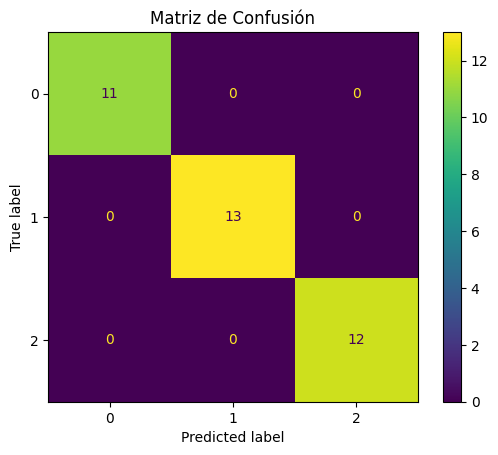

In [12]:
y_pred_classes = np.argmax(Y_pred2, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes)

Como podemos ver este segundo modelo ha conseguido un mejor accuracy que el primero:

$$ \text{Accuracy}_{1ermodelo}=0.91$$

$$ \text{Accuracy}_{2domodelo}=1.0$$

Por lo que podemos llegara a la conclusión de que en este dataset, al usar más capas ocultas y la función de la sigmoide, la red entrena mejor

Para comparar mejor ambos modelos, graficaremos la precisión y la pérdida a lo largo de las épocas:

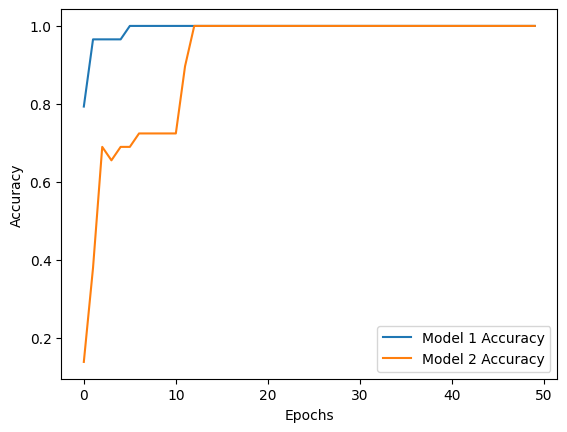

In [13]:
plt.plot(acc1, label="Model 1 Accuracy")
plt.plot(acc2, label="Model 2 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

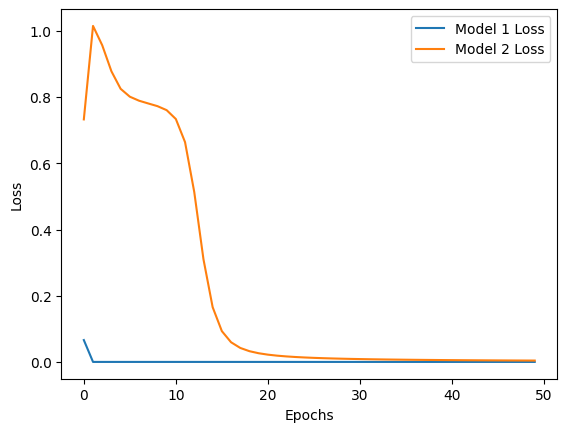

In [14]:
plt.plot(loss1, label="Model 1 Loss")
plt.plot(loss2, label="Model 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Y para terminar con este dataset, imprimiremos la curva de roc para estos dos modelos:

In [20]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_bin = label_binarize(y_test_labels, classes=np.arange(3))  
n_classes = y_test_bin.shape[1]

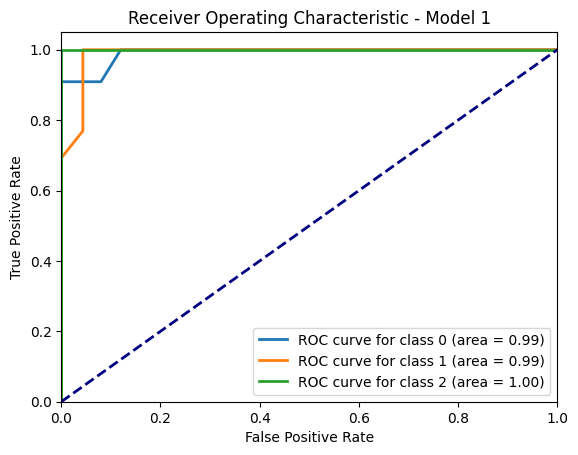

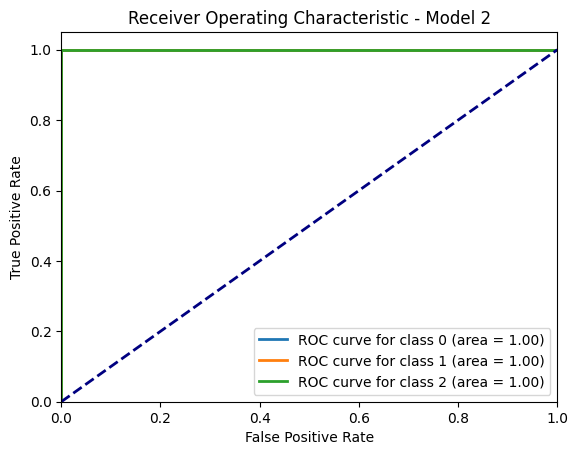

In [21]:
y_score1 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score1, y_test_bin, 1)

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  # Probabilidades de cada clase
plot_roc_curve(y_score2, y_test_bin, 2)